# NANOTORI

## Potrebne funkcije

In [1]:
# imamo grid... sestkotnik je 4 enote sirok in 2 enoti visok

A2 = vector([3, - 1]) # vektor desno dol
A1 = vector([0, - 2]) # vektor dol

############## Razredi #############

class U:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko A1 vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
               self.b == other.b and
               self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
#         return hash((self.a, self.b))
        return hash(exp(self.a + exp(self.b)))
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2
        x = vektor[0]
        y = vektor[1]
        return [x, y]
    
    def sosedi(self):
        s = set({V(self.a, self.b), V(self.a, self.b - 1), V(self.a + 1, self.b - 1)})
        return s
    
    def premakni(self, c, d):
        return U(self.a + c, self.b + d)
    
    def razlika(self, other):
        return (self.a - other.a, self.b - other.b)
    
class V:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko A1 vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
               self.b == other.b and
               self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
#         return hash((self.a, self.b))
        return hash(exp(self.a + exp(self.b)))
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2 + vector([2, 0])
        x = vektor[0]
        y = vektor[1]
        return [x, y]
    
    def sosedi(self):
        s = set({U(self.a, self.b), U(self.a - 1, self.b + 1), U(self.a, self.b + 1)})
        return s
        
    def premakni(self, c, d):
        return V(self.a + c, self.b + d)

############## Funkcije #############

def grid(k, l, m, n):
    # oglisca = ([0, 0], [k, l], [m, n], [k + m, l + n])
    # print U(0,0).koordinate(), U(k, l).koordinate(), U(m, n).koordinate(), U(k + m, l + n).koordinate()

    mina = min(0, k, m, k + m)
    maxa = max(0, k, m, k + m)
    minb = min(0, l, n, l + n)
    maxb = max(0, l, n, l + n)

    mnozica = set()
    for i in range(mina, maxa + 1):
        for j in range(minb, maxb + 1):
            mnozica.add(U(i, j))
    
    return mnozica

# lahko bi poskusili dodati le tiste, ki so "blizje" paralelogramu, ne celege pravokotnika
# def grid1(k, l, m, n):
#     mina = min(0, k, m, k + m)
#     maxa = max(0, k, m, k + m)
#     minb = min(0, l, n, l + n)
#     maxb = max(0, l, n, l + n)

#     mnozica = set()
#     for i in range(mina, maxa + 1):
#         for j in range(minb, maxb + 1):
#             mnozica.add(U(i, j))
    
#     return mnozica

# 3x3 matrika
def determinanta3x3(matrika): 
    a11 = matrika[0][0]
    a12 = matrika[0][1]
    a13 = matrika[0][2]
    
    a21 = matrika[1][0]
    a22 = matrika[1][1]
    a23 = matrika[1][2]
    
    a31 = matrika[2][0]
    a32 = matrika[2][1]
    a33 = matrika[2][2]
        
    det = (
          a11 * (a22 * a33 - a32 * a23) - 
          a12 * (a21 * a33 - a31 * a23) + 
          a13 * (a21 * a32 - a31 * a22)
          )
            
    return det

# gledamo kje je tocka w glede na vektor uv
# ce je tocka levo, je predznak determinante pozitiven,
# ce desno, je predznak negativen,
# ce pa so kolinearne je determinanta 0.
# sprejme tocke U ali V
def zavoj(u, v, w):
    u_x, u_y = u.koordinate()
    v_x, v_y = v.koordinate()
    w_x, w_y = w.koordinate()
    
    matrika = matrix([[1, 1, 1], [u_x, v_x, w_x], [u_y, v_y, w_y]])
    
    return sgn(determinanta3x3(matrika))

def v_paralelogramu(G, u0, u1, u2, u3):
    # G mnozica Ujev, ki jih bomo pregledali,
    # ui zaporedna oglisca v paralelogramu, tako da je notranjost na levi,
    # u0 pa je izhodisce 
    # dopuscamo tocke na daljici u0u1 in na daljici  u3u0
    
    Uji = set()
    Vji = set()
    
    for u in G:   
        v = V(u.a, u.b) # "pripadajoce" vozlisce V

        pogoj_u = (zavoj(u0, u1, u) >= 0 and
                   zavoj(u1, u2, u) >  0 and
                   zavoj(u2, u3, u) >  0 and
                   zavoj(u3, u0, u) >= 0)
        
        pogoj_v = (zavoj(u0, u1, v) >= 0 and
                   zavoj(u1, u2, v) >  0 and
                   zavoj(u2, u3, v) >  0 and
                   zavoj(u3, u0, v) >= 0)
        if pogoj_u:
            Uji.add(u)
        if pogoj_v:
            Vji.add(v)
    
    return Uji, Vji
    
def vozlisca_na_torusu(k, l, m, n):
    G = grid(k, l, m, n)
    
    u_00 = U(0,0)
    u_kl = U(k, l)
    u_klmn = U(k + m, l + n)
    u_mn = U(m, n)

    # ugotovimo orientacijo
    if zavoj(u_kl, u_mn, u_00) == 0:
        Uji, Vji = "Izrojen", "Izrojen" # niso mnozice
    elif zavoj(u_kl, u_mn, u_00) > 0:
        # u_00 lezi levo od vektorja u_kl u_mn
        Uji, Vji = v_paralelogramu(G, u_00, u_kl, u_klmn, u_mn)
    elif zavoj(u_kl, u_mn, u_00) < 0:
        # u_00 lezi desno od vektorja u_kl u_mn
        Uji, Vji = v_paralelogramu(G, u_00, u_mn, u_klmn, u_kl)
    
    return Uji, Vji

def povezave_na_torusu(k, l, m, n):
    Uji, Vji = vozlisca_na_torusu(k, l, m, n)
    if Uji == "Izrojen":
        return Uji # paralelogram je izrojen
    else:
        
        u_00 = U(0,0)
        u_kl = U(k, l)
        u_klmn = U(k + m, l + n)
        u_mn = U(m, n)
        
        if zavoj(u_kl, u_mn, u_00) > 0:
            #orientacija je "pozitivna": u_kl leži pod u_mn
            u0, u1, u2, u3 = u_00, u_kl, u_klmn, u_mn
        else:
            # u_00 lezi desno od vektorja u_kl u_mn
            u0, u1, u2, u3 = u_00, u_mn, u_klmn, u_kl
        
        a, b = u1.razlika(u0) # = u2 - u3 
        c, d = u3.razlika(u0) # = u2 - u1 
        
        povezave = []
        vozlisca = union(Uji, Vji)
        
        for tocka in Uji:
            for sosed in tocka.sosedi():
                while sosed not in vozlisca:
                    if zavoj(u0, u1, sosed) < 0:
                        sosed = sosed.premakni(c, d)
                    elif zavoj(u1, u2, sosed) <= 0:
                        sosed = sosed.premakni(-a, -b)
                    elif zavoj(u2, u3, sosed) <= 0:
                        sosed = sosed.premakni(-c, -d)
                    elif zavoj(u3, u0, sosed) < 0:
                        sosed = sosed.premakni(a, b)
                povezave.append((tocka, sosed))
                
        return povezave 

def nanotorus(k, l, m, n):
    p = povezave_na_torusu(k, l, m, n)
    if p == "Izrojen":
        print("Paralelogram je izrojen!")
    else:
        G = Graph(p, multiedges = True)
        G._pos = {v: v.koordinate() for v in G}
        return G


In [55]:
def vozlisca_na_razdalji_d(graf, tocka, dodane, d=0):
    # dodane je na zacetku prazna mnozica
    # tocka je vozlisce, kjer zacnemo
    if d == 0:
        dodane.add(tocka)
    elif d < 0:
        print("Negativna dolzina!")
    else:
        dodane.add(tocka)
        for sosed in graf[tocka]:
            vozlisca_na_razdalji_d(graf, sosed, dodane, d - 1)
    return dodane

# zanima nas za razdalje d, 1 <= d <= diam(graf)
# poskusi dobiti formulo za stevilo teh vozlisc v odvisnosti od k, l, m, n, d

## Primeri nanotorov

In [10]:
nanotorus(1,0,2,1)[U(0,0)]

[V(2a, 0b)]

(True, 40, 60, True, 6)


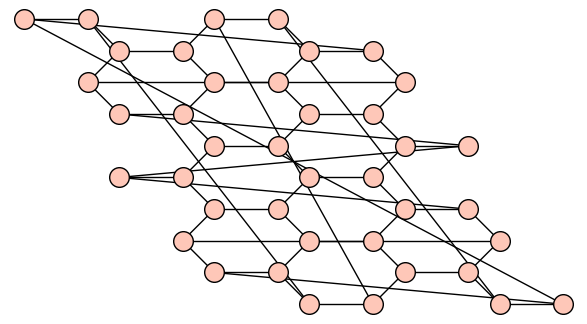

In [60]:
G = nanotorus(4,2,-2,4)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot(vertex_labels=False) 

(True, 480, 720, True, 36)


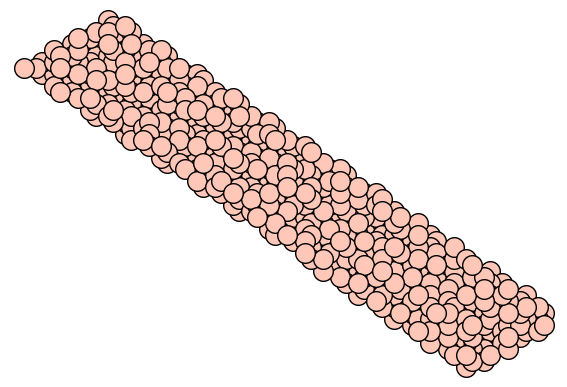

In [7]:
G = nanotorus(-7,5,13,25)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot(vertex_labels=False) 

(True, 1310, 1965, True, 35)


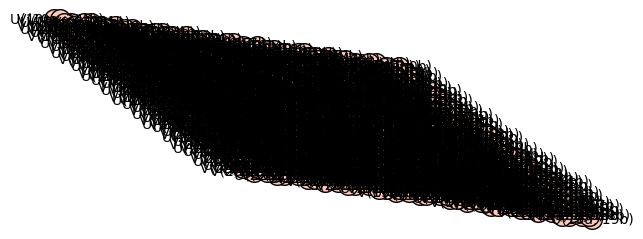

In [78]:
G = nanotorus(10,-35,13,20)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot() 

(True, 40, 60, True, 10)


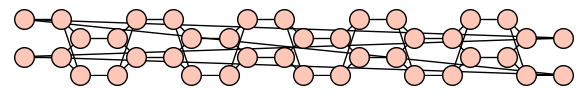

In [8]:
G = nanotorus(2,0,-5,10)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot(vertex_labels=False) 

## Iskanje formule za IZOMORFNOST

In [49]:
# G = nanotorus(2,0,-5,10)

# def izomorfna(F, G):
#     try:
#         return F.is_isomorphic(G)
#     except AttributeError:
#         return False

# for k in range(-10, 10):
#     for l in range(-10, 10):
#         for m in range(-10, 10):
#             for n in range(-10, 10):
#                 if izomorfna(nanotorus(k,l,m,n),G):
#                     print('{},{},{},{}'.format(k,l,m,n))


-10,-10,0,2
-10,-10,2,0
-10,-9,0,-2
-10,-9,0,2
-10,-8,0,-2
-10,-8,0,2
-10,-7,0,-2
-10,-7,0,2
-10,-6,0,-2
-10,-6,0,2
-10,-5,0,-2
-10,-5,0,2
-10,-4,0,-2
-10,-4,0,2
-10,-3,0,-2
-10,-3,0,2
-10,-2,0,-2
-10,-2,0,2
-10,-1,-10,1
-10,-1,0,-2
-10,-1,0,2
-10,0,-2,2
-10,0,0,-2
-10,0,0,2
-10,0,2,-2
-10,1,-10,-1
-10,1,0,-2
-10,1,0,2
-10,2,0,-2
-10,2,0,2
-10,3,0,-2
-10,3,0,2
-10,4,-10,6
-10,4,0,-2
-10,4,0,2
-10,5,0,-2
-10,5,0,2
-10,6,-10,4
-10,6,0,-2
-10,6,0,2
-10,7,0,-2
-10,7,0,2
-10,8,0,-2
-10,8,0,2
-10,9,0,-2
-10,9,0,2
-9,-10,-2,0
-9,-10,2,0
-9,-1,-2,2
-9,-1,2,-2
-8,-10,-2,0
-8,-10,2,0
-8,-2,-2,2
-8,-2,2,-2
-7,-10,-2,0
-7,-10,2,0
-7,-3,-2,2
-7,-3,2,-2
-6,-10,-2,0
-6,-10,2,0
-6,-4,-4,-6
-6,-4,-2,2
-6,-4,2,-2
-6,-4,4,6
-5,-10,-2,0
-5,-10,2,0
-5,-5,-2,2
-5,-5,2,-2
-4,-10,-2,0
-4,-10,2,0
-4,-6,-6,-4
-4,-6,-2,2
-4,-6,2,-2
-4,-6,6,4
-3,-10,-2,0
-3,-10,2,0
-3,-7,-2,2
-3,-7,2,-2
-2,-10,-2,0
-2,-10,2,0
-2,-8,-2,2
-2,-8,2,-2
-2,0,-9,-10
-2,0,-8,-10
-2,0,-7,-10
-2,0,-6,-10
-2,0,-5,-10
-2,0,-4,-10
-2,0,-3,-10

In [47]:
def izomorfni_graf(k, l, m, n):
    # hocemo dobiti graf oblike (0, l', m', n'), ki je izomorfen (k, l, m, n)
    # a * (k, l) = b * (m, n) + (0, c) # kateri vodoravni (desno dol) vektor povezuje (0, 0) - izhodišče 
    # in naslednjo (0, 0) točko. x in y bomo razložili kasneje.
    # d, x, y = xgcd(m, k)
    # d = abs(d)
    # a = m / d
    # b = k / d
    # c = abs(a * l - b * n) # = (m * l - k * n) / d
    
    # stevilo sestkotnikov = c * d = m * l - n * k = det([[k, l], [m, n]])
    # iscemo paralelogram druge oblike z istim stevilom seskotnikov, zato mora veljati:
    # det([[k, l], [m, n]]) = c * d = det([[0, l'], [m', n']]) ... se absolutne vrednosti
    # sledi: abs(c * d) = abs(m' * l')
    # iz konstrukcije: na zacetku smo fiksirali (0, l') = (0, c), torej l' = c in m' = d 
    # (Dobili bomo en graf, ki je izomorfen in ne vseh)
    
    # ll = c
    # mm = d
    
    # veljati mora tudi (m', n') = x * (k, l) + y * (m, n) 
    # (z x vektorji (k, l) in y vektorji (m, n) moramo priti v točko (m', n'), ker mora biti oblike (0, 0) )
    # Iz prvega pogoja dobimo enačbo m' = d = gcd(m, k) = x * k + y * n. x in y smo poračunali zgoraj.
    
    # iz drugega pogoja poracunamo:
    
    # nn = x * l + y * n 
    
    # da bi dobili več različni izomorfnih nanotorov, bi lahko vzeli nn po mod(l')
    # l' = c (toliko stolpcev je med dvema sestkotnikoma oblike (0, 0) v doloceni vrstici)
    
    # vrnemo nanotorus(0, l', m', n')
    
    d, x, y = xgcd(k, m)
    d = abs(d)
    a = m / d
    b = k / d
    c = abs(a * l - b * n)
    
    ll = c
    mm = d
    
    nn = x * l + y * n 
    
    return nanotorus(0, ll, mm, nn)

In [48]:
nanotorus(3, 1, 1, 2).is_isomorphic(izomorfni_graf(3, 1, 1, 2))

True

In [49]:
k = 5
l = -3
m = 2
n = 4

nanotorus(k, l, m, n).is_isomorphic(izomorfni_graf(k, l, m, n))

True

In [50]:
k = 7
l = -1
m = 4
n = 1

nanotorus(k, l, m, n).is_isomorphic(izomorfni_graf(k, l, m, n))

True

In [53]:
k = 20
l = -17
m = 3
n = 7

nanotorus(k, l, m, n).is_isomorphic(izomorfni_graf(k, l, m, n))

True

## Iskanje formule za ŠTEVILO TOČK DO DANE RAZDALJE:

In [56]:
J = nanotorus(1,0,0,10)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))
vozlisca_na_razdalji_d(J, U(0,0), set(), 1)

1 tock na razdalji 0
3 tock na razdalji 1
5 tock na razdalji 2
7 tock na razdalji 3
9 tock na razdalji 4
11 tock na razdalji 5
13 tock na razdalji 6
15 tock na razdalji 7
17 tock na razdalji 8
19 tock na razdalji 9


{V(1a, 0b), U(0a, 0b), V(1a, 9b)}

In [57]:
J = nanotorus(1,0,0,10)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))
vozlisca_na_razdalji_d(J, U(0,0), set(), 1)

1 tock na razdalji 0
3 tock na razdalji 1
5 tock na razdalji 2
7 tock na razdalji 3
9 tock na razdalji 4
11 tock na razdalji 5
13 tock na razdalji 6
15 tock na razdalji 7
17 tock na razdalji 8
19 tock na razdalji 9


{V(1a, 0b), V(1a, 9b), U(0a, 0b)}

In [58]:
J = nanotorus(2,0,0,10)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))
vozlisca_na_razdalji_d(J, U(0,0), set(), 1)

1 tock na razdalji 0
4 tock na razdalji 1
9 tock na razdalji 2
14 tock na razdalji 3
18 tock na razdalji 4
22 tock na razdalji 5
26 tock na razdalji 6
30 tock na razdalji 7
34 tock na razdalji 8
38 tock na razdalji 9


{V(2a, 0b), V(2a, 9b), V(1a, 9b), U(0a, 0b)}

In [59]:
J = nanotorus(3,0,0,10)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
4 tock na razdalji 1
10 tock na razdalji 2
18 tock na razdalji 3
26 tock na razdalji 4
33 tock na razdalji 5
39 tock na razdalji 6
45 tock na razdalji 7
51 tock na razdalji 8
57 tock na razdalji 9


In [87]:
J = nanotorus(4,0,0,10)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
4 tock na razdalji 1
10 tock na razdalji 2
19 tock na razdalji 3
30 tock na razdalji 4
41 tock na razdalji 5
51 tock na razdalji 6
60 tock na razdalji 7
68 tock na razdalji 8
76 tock na razdalji 9


In [40]:
J = nanotorus(2,0,-5,10)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
4 tock na razdalji 1
9 tock na razdalji 2
14 tock na razdalji 3
18 tock na razdalji 4
22 tock na razdalji 5
26 tock na razdalji 6
30 tock na razdalji 7
34 tock na razdalji 8
38 tock na razdalji 9


In [116]:
J = nanotorus(1,0,0,1)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0


In [117]:
J = nanotorus(0,1,1,0)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0


In [118]:
J = nanotorus(-1,0,0,-1)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0


In [119]:
J = nanotorus(0,1,1,0)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0


In [120]:
J = nanotorus(2,0,0,1)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
3 tock na razdalji 1


In [124]:
J = nanotorus(3,0,0,1)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
3 tock na razdalji 1
5 tock na razdalji 2


In [123]:
J = nanotorus(8,0,0,1)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
3 tock na razdalji 1
5 tock na razdalji 2
7 tock na razdalji 3
9 tock na razdalji 4
11 tock na razdalji 5
13 tock na razdalji 6
15 tock na razdalji 7


In [125]:
J = nanotorus(2,0,0,2)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
4 tock na razdalji 1
7 tock na razdalji 2


In [126]:
J = nanotorus(3,0,0,2)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
4 tock na razdalji 1
9 tock na razdalji 2


In [127]:
J = nanotorus(4,0,0,2)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
4 tock na razdalji 1
9 tock na razdalji 2
14 tock na razdalji 3


In [128]:
J = nanotorus(8,0,0,2)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
4 tock na razdalji 1
9 tock na razdalji 2
14 tock na razdalji 3
18 tock na razdalji 4
22 tock na razdalji 5
26 tock na razdalji 6
30 tock na razdalji 7


In [133]:
J = nanotorus(10,0,0,3)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
4 tock na razdalji 1
10 tock na razdalji 2
18 tock na razdalji 3
26 tock na razdalji 4
33 tock na razdalji 5
39 tock na razdalji 6
45 tock na razdalji 7
51 tock na razdalji 8
57 tock na razdalji 9


In [96]:
k, l, m, n = 10, 0, 0, 2

H = nanotorus(k, l, m, n)
radij = H.diameter()
print("Radij je {}, (k, l, m, n) = ({},{},{},{})".format(radij, k, l, m, n))
for d in range(radij + 1):
    #print("korak :", d)
    bliznje = vozlisca_na_razdalji_d(H, U(0,0), set(), d)
    #print(bliznje)
    print("{} tock na razdalji {}".format(len(bliznje), d))

Radij je 10, (k, l, m, n) = (10,0,0,2)
1 tock na razdalji 0
4 tock na razdalji 1
9 tock na razdalji 2
14 tock na razdalji 3
18 tock na razdalji 4
22 tock na razdalji 5
26 tock na razdalji 6
30 tock na razdalji 7
34 tock na razdalji 8
38 tock na razdalji 9
40 tock na razdalji 10


In [99]:
k, l, m, n = 0, 5, 10, 0

H = nanotorus(k, l, m, n)
radij = H.diameter()
print("Radij je {}, (k, l, m, n) = ({},{},{},{})".format(radij, k, l, m, n))
for d in range(radij + 1):
    #print("korak :", d)
    bliznje = vozlisca_na_razdalji_d(H, U(0,0), set(), d)
    #print(bliznje)
    print("{} tock na razdalji {}".format(len(bliznje), d))

Radij je 10, (k, l, m, n) = (0,5,10,0)
1 tock na razdalji 0
4 tock na razdalji 1
10 tock na razdalji 2
19 tock na razdalji 3
31 tock na razdalji 4
45 tock na razdalji 5
59 tock na razdalji 6
72 tock na razdalji 7
84 tock na razdalji 8
95 tock na razdalji 9
100 tock na razdalji 10


# Čas izvajanja

In [26]:
# ### PODALJSEVANJE PARALELGRAMA V ENO SMER ###

# import time

# # fiksiramo k = 0, l = 5, n = 0 , (m = m)
# k, l, n = 0, 2, 0

# P1 = []
# T1 = []
# for m in range(151):
#     zacetek = time.time()
#     G = nanotorus(k, l, m, n)
#     konec = time.time()
#     print("Za konstrukcijo nanotora ({}, {}, {}, {}) sem porabil {} sekund.".format(k, l, m, n, konec - zacetek))
    
#     P1.append(m) # parametri
#     T1.append(konec - zacetek) # cas
    

Paralelogram je izrojen!
Za konstrukcijo nanotora (0, 2, 0, 0) sem porabil 0.0207719802856 sekund.
Za konstrukcijo nanotora (0, 2, 1, 0) sem porabil 0.0317900180817 sekund.
Za konstrukcijo nanotora (0, 2, 2, 0) sem porabil 0.0454969406128 sekund.
Za konstrukcijo nanotora (0, 2, 3, 0) sem porabil 0.0763080120087 sekund.
Za konstrukcijo nanotora (0, 2, 4, 0) sem porabil 0.100385189056 sekund.
Za konstrukcijo nanotora (0, 2, 5, 0) sem porabil 0.144529819489 sekund.
Za konstrukcijo nanotora (0, 2, 6, 0) sem porabil 0.144497871399 sekund.
Za konstrukcijo nanotora (0, 2, 7, 0) sem porabil 0.160187005997 sekund.
Za konstrukcijo nanotora (0, 2, 8, 0) sem porabil 0.173603057861 sekund.
Za konstrukcijo nanotora (0, 2, 9, 0) sem porabil 0.211519002914 sekund.
Za konstrukcijo nanotora (0, 2, 10, 0) sem porabil 0.23780798912 sekund.
Za konstrukcijo nanotora (0, 2, 11, 0) sem porabil 0.236883878708 sekund.
Za konstrukcijo nanotora (0, 2, 12, 0) sem porabil 0.286211967468 sekund.
Za konstrukcijo nano

Za konstrukcijo nanotora (0, 2, 112, 0) sem porabil 2.93941617012 sekund.
Za konstrukcijo nanotora (0, 2, 113, 0) sem porabil 2.80138301849 sekund.
Za konstrukcijo nanotora (0, 2, 114, 0) sem porabil 2.67629003525 sekund.
Za konstrukcijo nanotora (0, 2, 115, 0) sem porabil 3.09534311295 sekund.
Za konstrukcijo nanotora (0, 2, 116, 0) sem porabil 2.63978791237 sekund.
Za konstrukcijo nanotora (0, 2, 117, 0) sem porabil 2.62199115753 sekund.
Za konstrukcijo nanotora (0, 2, 118, 0) sem porabil 2.64522314072 sekund.
Za konstrukcijo nanotora (0, 2, 119, 0) sem porabil 2.68901395798 sekund.
Za konstrukcijo nanotora (0, 2, 120, 0) sem porabil 2.96121311188 sekund.
Za konstrukcijo nanotora (0, 2, 121, 0) sem porabil 2.77066802979 sekund.
Za konstrukcijo nanotora (0, 2, 122, 0) sem porabil 2.77597498894 sekund.
Za konstrukcijo nanotora (0, 2, 123, 0) sem porabil 2.83251905441 sekund.
Za konstrukcijo nanotora (0, 2, 124, 0) sem porabil 2.80027580261 sekund.
Za konstrukcijo nanotora (0, 2, 125, 0

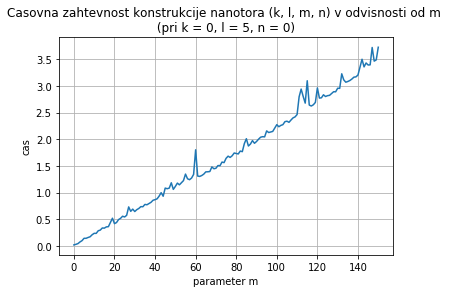

In [27]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(P1, T1)

ax.set(xlabel='parameter m', ylabel='cas',
       title='Casovna zahtevnost konstrukcije nanotora (k, l, m, n) v odvisnosti od m \n (pri k = 0, l = 5, n = 0) ')
ax.grid()

fig.savefig("zahtevnost1.png")
plt.show()

In [24]:
# ## PODALJSEVANJE PARALELGRAMA V DVE SMERI ###

# import time

# k, l, n = 0, 0, 0

# P2 = []
# T2 = []
# for m in range(51):
#     zacetek = time.time()
#     G = nanotorus(k, l, m, n)
#     konec = time.time()

#     print("Za konstrukcijo nanotora ({}, {}, {}, {}) sem porabil {} sekund.".format(k, l, m, n, konec - zacetek))
    
#     # podaljsamo paralelgram še v drugo smer
#     l += 1
    
#     P2.append(m) # parametri
#     T2.append(konec - zacetek) # cas

Paralelogram je izrojen!
Za konstrukcijo nanotora (0, 0, 0, 0) sem porabil 0.00386810302734 sekund.
Za konstrukcijo nanotora (0, 1, 1, 0) sem porabil 0.0258169174194 sekund.
Za konstrukcijo nanotora (0, 2, 2, 0) sem porabil 0.055478811264 sekund.
Za konstrukcijo nanotora (0, 3, 3, 0) sem porabil 0.098217010498 sekund.
Za konstrukcijo nanotora (0, 4, 4, 0) sem porabil 0.195756912231 sekund.
Za konstrukcijo nanotora (0, 5, 5, 0) sem porabil 0.251332044601 sekund.
Za konstrukcijo nanotora (0, 6, 6, 0) sem porabil 0.369438171387 sekund.
Za konstrukcijo nanotora (0, 7, 7, 0) sem porabil 0.456685066223 sekund.
Za konstrukcijo nanotora (0, 8, 8, 0) sem porabil 0.557857036591 sekund.
Za konstrukcijo nanotora (0, 9, 9, 0) sem porabil 0.708075046539 sekund.
Za konstrukcijo nanotora (0, 10, 10, 0) sem porabil 0.89746594429 sekund.
Za konstrukcijo nanotora (0, 11, 11, 0) sem porabil 1.14458298683 sekund.
Za konstrukcijo nanotora (0, 12, 12, 0) sem porabil 1.35836791992 sekund.
Za konstrukcijo nano

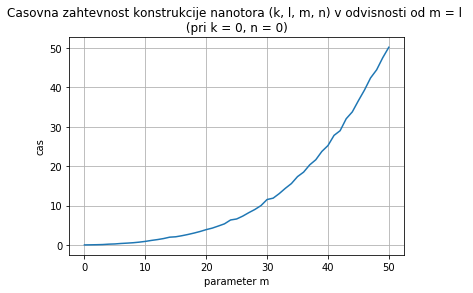

In [25]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(P2, T2)

ax.set(xlabel='parameter m', ylabel='cas',
       title='Casovna zahtevnost konstrukcije nanotora (k, l, m, n) v odvisnosti od m = l \n (pri k = 0, n = 0) ')
ax.grid()

fig.savefig("zahtevnost2.png")
plt.show()